In [1]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


#Linear Regression Weights

In [ ]:
#S
data_df=pd.read_csv("/content/drive/MyDrive/MLBootcamp/Colab_Notebooks/Data/house-prices-advanced-regression-techniques/train.csv")

In [5]:
data_df = pd.read_csv("/content/drive/MyDrive/house-prices-advanced-regression-techniques.zip (Unzipped Files)/train.csv")

In [6]:
#dropping all the columns we one hot vectorized
clean_df = data_df.drop(columns = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'Heating'])

In [7]:
#combined all the odd columns together
clean_df = clean_df.dropna()

In [8]:
clean = clean_df
clean = clean_df.dropna()

In [9]:
#divide the data
X=clean.drop(['SalePrice'], axis=1) #axis=1 means along the column, axis=0 means along the row
y=clean['SalePrice']


In [10]:
X = imputer.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

NameError: ignored

In [11]:
#fit into model
lr=LinearRegression()
lr.fit(X, y)

LinearRegression()

In [12]:
#grabs weights
print("Const", lr.intercept_, "Attributes Coeff", lr.coef_)

Const -1585945.199764707 Attributes Coeff [-3.21101476e+00 -1.61551914e+02 -1.31451327e+02  4.93240879e-01
  7.34656411e+03  5.62646609e+02  2.30017645e+02  3.71853997e+01
  1.10650440e+01  2.60383680e-01  4.00083634e+00  1.53262640e+01
  1.42868931e+01  1.82358934e+01  1.01441963e+01  4.26669828e+01
  9.78030410e+03  1.44380769e+03  8.47530342e+03 -2.41122614e+03
 -1.49594389e+04 -3.89083514e+04  7.54049892e+03  8.70535437e+03
 -3.29851624e+01  2.10394311e+04  4.93927422e+00  2.23436977e+01
  3.38431151e+00  3.51338595e+01  2.91095891e+01  6.39189706e+01
 -6.54984179e+01 -7.93390936e+00  2.78983796e+02  4.64189145e+01]


In [13]:
#turns weights into tables
weights = list(zip(clean.columns.values, lr.coef_))

In [14]:
#applies absolute value
weights.sort(key=lambda x: abs(x[1]), reverse=True)

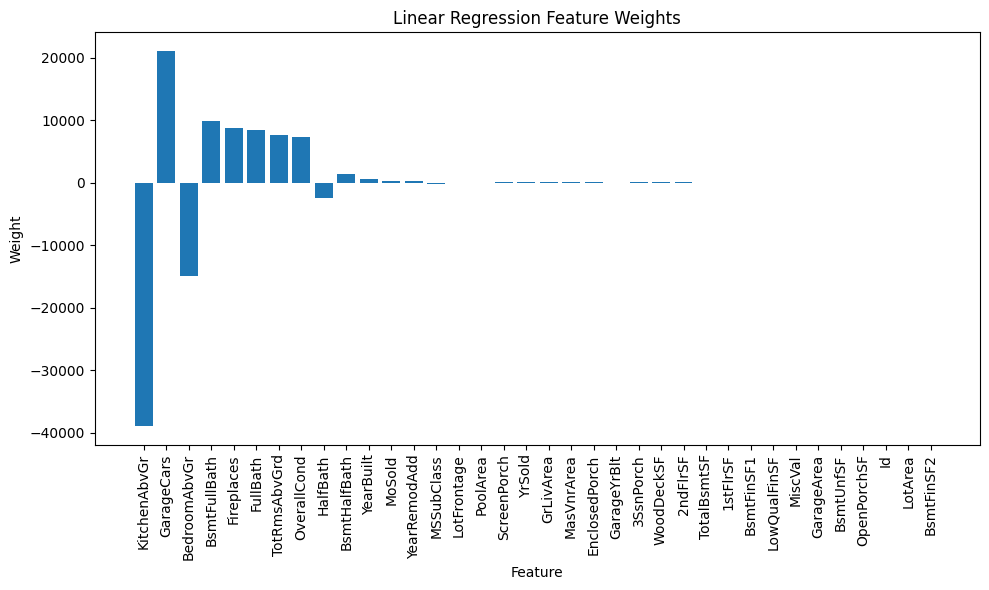

In [15]:
# Plot the feature weights
plt.figure(figsize=(10, 6))
plt.bar([w[0] for w in weights], [w[1] for w in weights])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Weight')
plt.title('Linear Regression Feature Weights')
plt.tight_layout()
plt.show()

In [16]:
print(clean.columns.values)

['Id' 'MSSubClass' 'LotFrontage' 'LotArea' 'OverallCond' 'YearBuilt'
 'YearRemodAdd' 'MasVnrArea' 'BsmtFinSF1' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' '1stFlrSF' '2ndFlrSF' 'LowQualFinSF' 'GrLivArea'
 'BsmtFullBath' 'BsmtHalfBath' 'FullBath' 'HalfBath' 'BedroomAbvGr'
 'KitchenAbvGr' 'TotRmsAbvGrd' 'Fireplaces' 'GarageYrBlt' 'GarageCars'
 'GarageArea' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch' '3SsnPorch'
 'ScreenPorch' 'PoolArea' 'MiscVal' 'MoSold' 'YrSold' 'SalePrice']


#Running the Regressor

In [17]:
import pandas as pd

In [18]:
#one hot vectorizing the data that isn't one hot vectorized
cols_to_encode = ['MSZoning', 'Street', 'Alley','LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'Heating']
ohe = pd.get_dummies(data_df[cols_to_encode])
data_df = pd.concat([data_df, ohe], axis=1)

In [19]:
#dropping all the columns we one hot vectorized
clean_df = data_df.drop(columns = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'Heating'])

In [24]:
from sklearn.ensemble import RandomForestRegressor
X = clean_df.drop(['SalePrice', 'Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'YearBuilt',
                      'YearRemodAdd', 'MasVnrArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
                      'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
                      'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
                      'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
                      'MoSold', 'YrSold', 'TotalBsmtSF'], axis=1) #, '
y = clean_df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model using RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 30092.13541477492
